In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

#----------DATA READING 
filename = 'https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv'

print(tf.__version__)
# read file
csv_data = pd.read_csv(filename, sep=',')
#sep=',': The sep parameter specifies the separator used in the CSV file. 
print(csv_data.head()) 
#head-> gives the first 5 rows of the csv dataset.


2.12.0
   120    4  setosa  versicolor  virginica
0  6.4  2.8     5.6         2.2          2
1  5.0  2.3     3.3         1.0          1
2  4.9  2.5     4.5         1.7          2
3  4.9  3.1     1.5         0.1          0
4  5.7  3.8     1.7         0.3          0


In [4]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

#----------DATA CLEANUP 
csv_data.columns = column_names # new_header #set the header row as the data header
print(csv_data.head()) 
# look at simple data statistics
print(csv_data.describe().transpose())
#prints the summary of the data and transpose it.

   sepal_length  sepal_width  petal_length  petal_width  species
0           6.4          2.8           5.6          2.2        2
1           5.0          2.3           3.3          1.0        1
2           4.9          2.5           4.5          1.7        2
3           4.9          3.1           1.5          0.1        0
4           5.7          3.8           1.7          0.3        0
              count      mean       std  min    25%  50%    75%  max
sepal_length  120.0  5.845000  0.868578  4.4  5.075  5.8  6.425  7.9
sepal_width   120.0  3.065000  0.427156  2.0  2.800  3.0  3.300  4.4
petal_length  120.0  3.739167  1.822100  1.0  1.500  4.4  5.100  6.9
petal_width   120.0  1.196667  0.782039  0.1  0.300  1.3  1.800  2.5
species       120.0  1.000000  0.840168  0.0  0.000  1.0  2.000  2.0


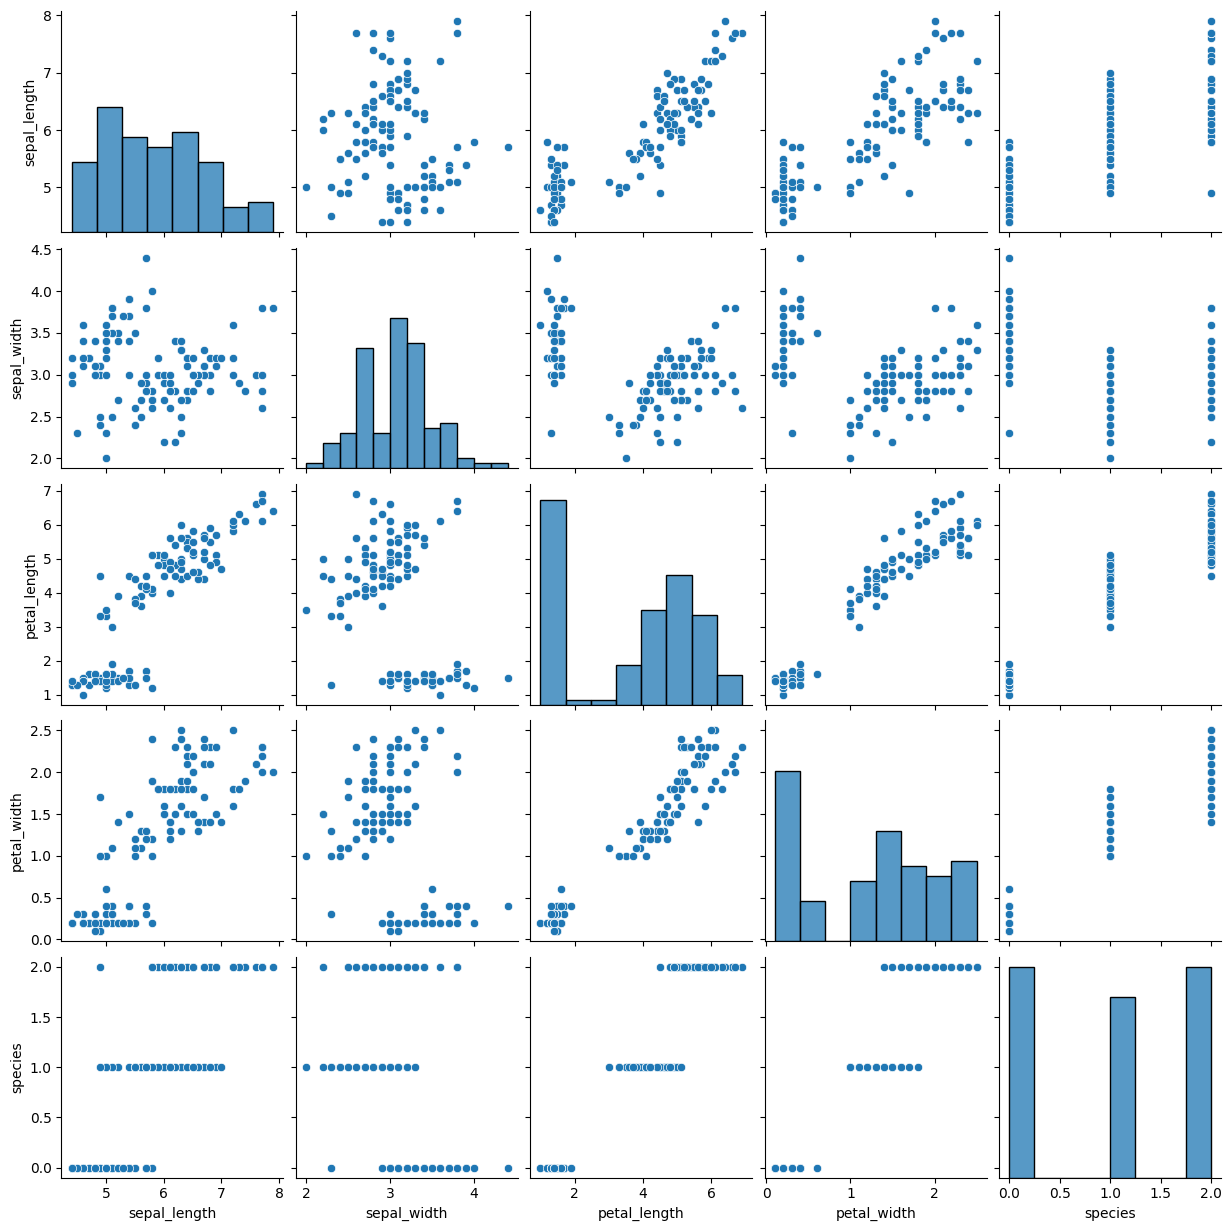

In [6]:
# plot of all features agains each other
sns.pairplot(csv_data)
#sns provides a high-level interface for creating informative and attractive statistical graphics.
#pairplot-> generate a grid of scatter plots where each variable will be plotted against every other variable.
#variables plotted against itself is given by histogram.

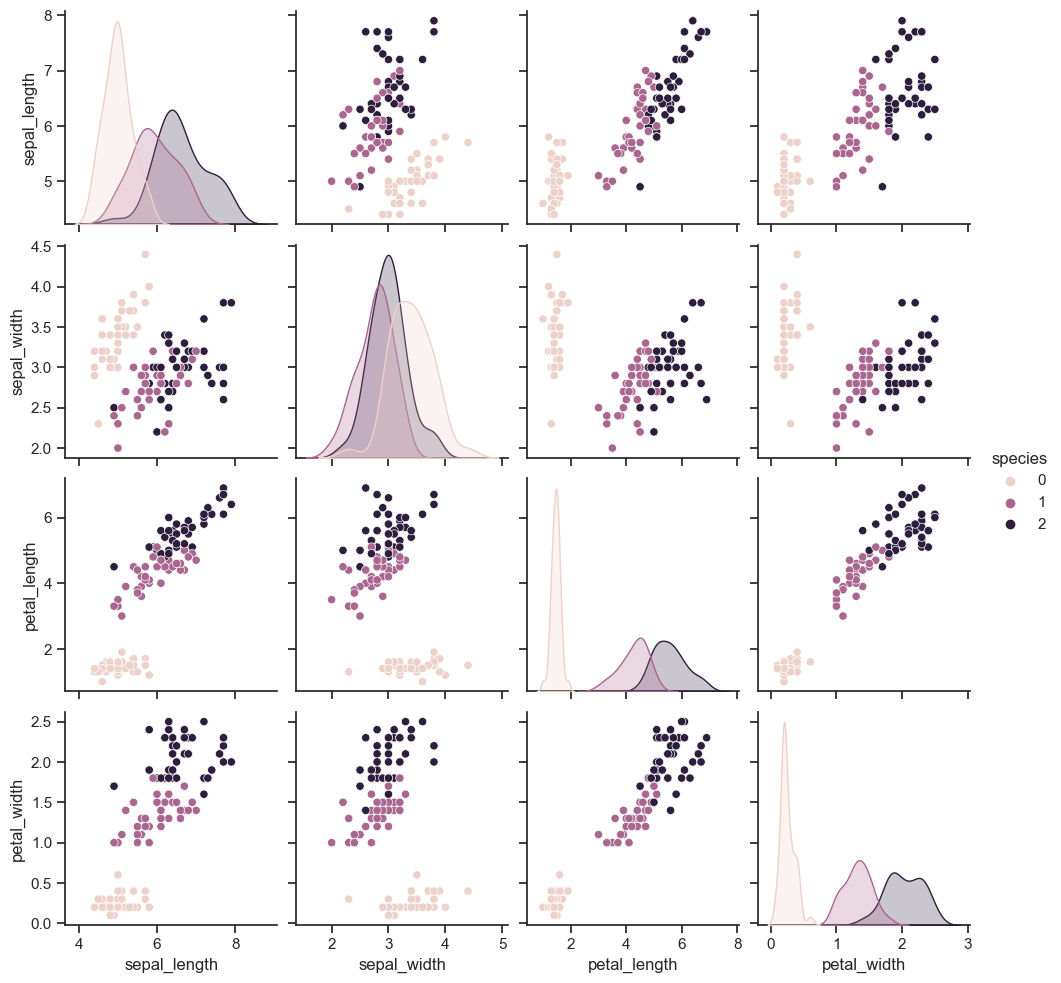

In [15]:
sns.set(style="ticks", color_codes=True)
#sets the default aesthetic parameters for the plots.
sns.pairplot(csv_data, hue='species') 

In [16]:
#----------TRAIN/TEST SPLIT 
train_data = csv_data.sample(frac=0.8) # take 80% randomly from the data for training
test_data = csv_data.drop(train_data.index) # reserve the rest for testing

# separate out the y (results) from x (features) for training
x_train = train_data.drop('species', axis=1)
y_train = train_data['species']
# normalize the training data
x_train = (x_train-x_train.min())/(x_train.max()-x_train.min())

# separate out the y (results) from x (features) testing
x_test = test_data.drop('species', axis=1)
y_test = test_data['species']
# normalize the test data
x_test = (x_test-x_test.min())/(x_test.max()-x_test.min()) 

print('Training Data\n', x_train.describe().transpose())
print('Test Data\n', x_test.describe().transpose())

Training Data
               count      mean       std  min       25%       50%       75%   
sepal_length   96.0  0.413690  0.243638  0.0  0.200000  0.400000  0.571429  \
sepal_width    96.0  0.438802  0.183667  0.0  0.333333  0.416667  0.541667   
petal_length   96.0  0.455114  0.326159  0.0  0.054545  0.563636  0.709091   
petal_width    96.0  0.444444  0.318454  0.0  0.083333  0.500000  0.708333   

              max  
sepal_length  1.0  
sepal_width   1.0  
petal_length  1.0  
petal_width   1.0  
Test Data
               count      mean       std  min       25%       50%       75%   
sepal_length   24.0  0.397849  0.305978  0.0  0.129032  0.387097  0.629032  \
sepal_width    24.0  0.508929  0.265857  0.0  0.410714  0.428571  0.660714   
petal_length   24.0  0.488701  0.332948  0.0  0.097458  0.601695  0.728814   
petal_width    24.0  0.528986  0.372178  0.0  0.076087  0.608696  0.913043   

              max  
sepal_length  1.0  
sepal_width   1.0  
petal_length  1.0  
petal_width 

In [17]:
#--------MODEL BUILDING
num_params = len(x_train.keys())
print(num_params)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_02"),
    # 3 nodes in the output for 'species'
    tf.keras.layers.Dense(3, name="Output_Layer")
  ])

learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
              # loss function to minimize
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              # (tf.keras.losses.SparseCategoricalCrossentropy) is a loss function for multi-class classification problems. 
              # It is suitable when your targets are integers (sparse labels) rather than one-hot encoded vectors.
              # (from_logits=True) indicates that the model's output does not have softmax activation applied. 
              # Instead, it expects raw logits. 
              metrics=['acc',])

model.summary()

4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_01 (Dense)            (None, 32)                160       
                                                                 
 dense_02 (Dense)            (None, 32)                1056      
                                                                 
 Output_Layer (Dense)        (None, 3)                 99        
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [20]:
#--------SANITY CHECK
# take an example batch and try to predict (we haven't trained yet!)
# a sanity check is commonly performed to validate the behavior of a model before proceeding with more extensive training or evaluation.
example_batch = x_train[:10]

# this gives the log likelihood of the the classes
example_result_log = model.predict(example_batch)
print('Likelihood', example_result_log)
# this gives the probabilities of the classes (should sum up to 1)
# (tf.nn.softmax(p_test)) applies the softmax function to convert the log-likelihoods into probabilities.
example_result_prob = tf.nn.softmax(example_result_log).numpy()

# these values should be similar and equal to (1/3), because we haven't trained yet and weights are random
print('Probabilities', example_result_prob)


1/1 [==============================] - 0s 15ms/step
Likelihood [[-0.04447608 -0.15445255  0.00750388]
 [-0.14094615 -0.14500117 -0.03276594]
 [-0.02695463 -0.12433608  0.01544855]
 [ 0.19548306 -0.12591381  0.09964041]
 [ 0.27826324 -0.20178114  0.12173946]
 [ 0.2735331  -0.12836601  0.14335647]
 [ 0.252227   -0.15777811  0.13072999]
 [ 0.24513783 -0.1131622   0.13534838]
 [-0.03907588 -0.14367652  0.00809213]
 [ 0.20887814 -0.10515084  0.10762111]]
Probabilities [[0.3390739  0.3037611  0.35716504]
 [0.32152256 0.3202214  0.35825604]
 [0.33892277 0.30747408 0.3536032 ]
 [0.37968788 0.27532512 0.34498703]
 [0.4042254  0.25011688 0.34565768]
 [0.39262053 0.26268208 0.3446974 ]
 [0.3922737  0.2603312  0.3473951 ]
 [0.38537335 0.26932332 0.3453033 ]
 [0.33910003 0.305422   0.35547793]
 [0.3796221  0.2773131  0.34306476]]


In [21]:
# Fit/TRAIN model on training data
history = model.fit(x_train, y_train, batch_size=4, epochs=100, validation_split=0.2, verbose=1)

#batch_size specifies the number of samples per gradient update. It controls how many samples are processed before the model's internal parameters are updated. 
#In this case, a batch size of 4 is used, meaning that the model will update its parameters after processing every 4 samples.

#epochs determines the number of times the entire training dataset is passed through the model. Each epoch consists of multiple batches. 
#In this example, the model will be trained for 100 epochs, iterating over the entire dataset 100 times.

#validation_split specifies the fraction of the training data to be used as validation data. In this case, 20% of the training data will be used for validation during training. 
#This helps monitor the model's performance on unseen data and detect overfitting.

#verbose controls the verbosity mode during training. Setting it to 1 displays progress bar and training logs, while 0 disables the logs.


Epoch 1/100
19/19 [==============================] - 1s 10ms/step - loss: 1.0693 - acc: 0.5263 - val_loss: 1.0726 - val_acc: 0.6000
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.9871 - acc: 0.7237 - val_loss: 1.0122 - val_acc: 0.6000
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.9050 - acc: 0.7237 - val_loss: 0.9347 - val_acc: 0.6000
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.8226 - acc: 0.7237 - val_loss: 0.8603 - val_acc: 0.6000
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.7450 - acc: 0.7237 - val_loss: 0.7887 - val_acc: 0.6000
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6736 - acc: 0.7237 - val_loss: 0.7328 - val_acc: 0.6000
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6139 - acc: 0.7237 - val_loss: 0.6804 - val_acc: 0.6000
Epoch 8/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5647 - 

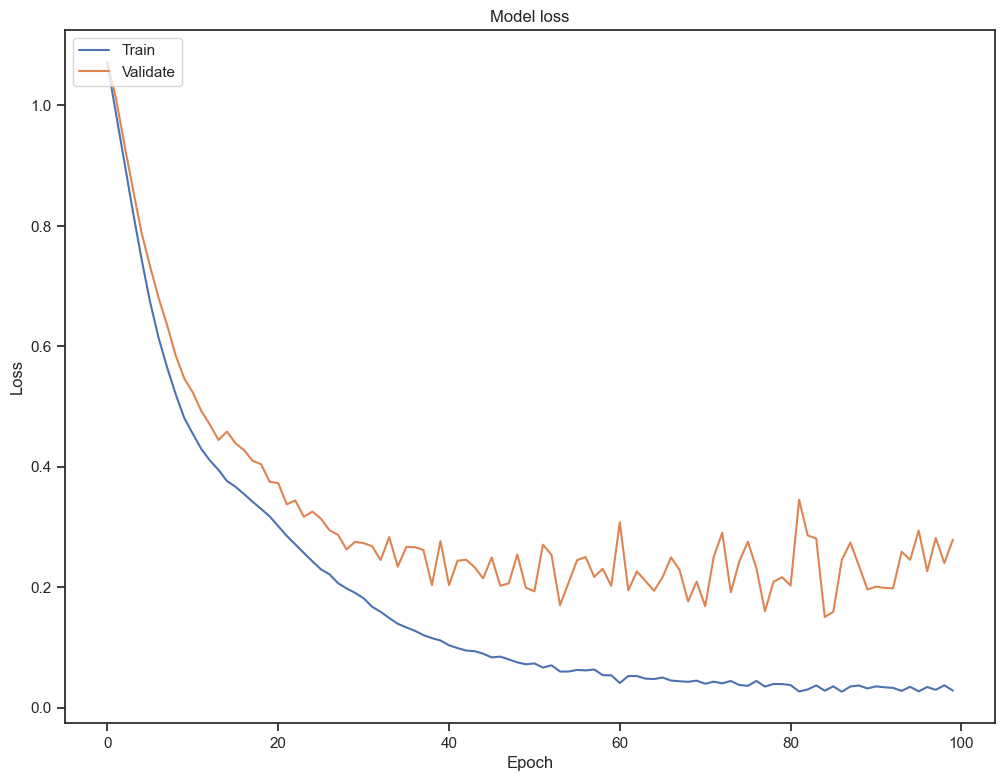

In [22]:
#--------MONITOR
# Plot training & validation loss values
fig = plt.figure(figsize=(12,9))
#fig = plt.figure(figsize=(12, 9)) creates a new figure with a specified size of 12 inches (width) and 9 inches (height). This sets the dimensions of the plot.
plt.plot(history.history['loss'])
#plt.plot(history.history['loss']) plots the training loss values. history.history['loss'] retrieves the loss values recorded during training.
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()
#In summary, the training error represents the model's performance on the training data, the validation error helps in monitoring the model's performance during training and 
#guiding the hyperparameter tuning process, and the test error provides an unbiased evaluation of the model's generalization performance on unseen data.


In [24]:
#--------EVALUATE
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'Accuracy:', acc)

#model.evaluate() is used to evaluate the model on the test data.
#verbose=2 sets the verbosity mode to 2, which displays a progress bar during evaluation.
#The evaluate() method returns the loss value and any additional metrics specified during model compilation. 
#In this case, the loss value is assigned to loss and the accuracy is assigned to acc.

1/1 - 0s - loss: 0.1051 - acc: 0.9583 - 28ms/epoch - 28ms/step
Loss: 0.10506277531385422 Accuracy: 0.9583333134651184


In [26]:
#--------PREDICT

p_test = model.predict(x_test) # get the log likelihoods
# '.numpy()' converts the resulting probabilities to a NumPy array and stores them in the p_test_probabs variable.
p_test_probabs = tf.nn.softmax(p_test).numpy() # convert to probabilities

# 'np.argmax' returns the index of the class with the highest probability for each sample in p_test_probabs. 
p_test_class = np.argmax(p_test_probabs, axis=1) # get the max out of the 3 probabilities
print("Predicted Class:", p_test_class, '\nActuals:\n', y_test.to_string(index=False))

1/1 [==============================] - 0s 18ms/step
Predicted Class: [2 2 1 2 2 1 2 0 2 2 0 0 2 0 1 1 2 2 1 0 1 0 0 0] 
Actuals:
 2
2
1
2
2
1
1
0
2
2
0
0
2
0
1
1
2
2
1
0
1
0
0
0


<AxesSubplot: >

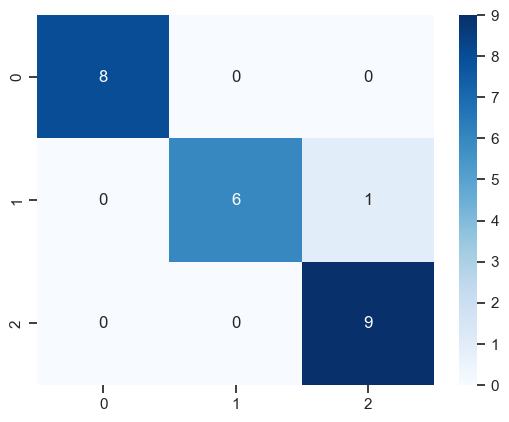

In [27]:
# plot the confision matrix as heatmap
sns.heatmap(tf.math.confusion_matrix(y_test, p_test_class), cmap="Blues", annot=True)